In [14]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
brendan45774_test_file_path = kagglehub.dataset_download('brendan45774/test-file')

print('Data source import complete.')


Data source import complete.


In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
df = pd.read_csv('/content/tested.csv')

In [17]:
df

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male   NaN      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male   NaN      0      0   
417                      Peter, Master. Michael J    male   NaN      1      1   

                 Ticket      Fare Cabin Embarked  
0                330911    7.8292   NaN        Q  
1                363272    7.0000   NaN        S  
2                240276    9.6875   NaN        Q  
3                315154    8.6625   NaN        S  
4               3101298   12.2875   NaN        S  
..                  ...       ...   ...      ...  
413           A.5. 3236    8.0500   NaN        S  
414            PC 17758  108.9000  C105        C  
415  SOTON/O.Q. 3101262    7.2500   NaN        S  
416              359309    8.0500   NaN        S  
417                2668   22.3583   NaN        C  

[418 rows x 12 columns]

In [18]:
df.shape

(418, 12)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [20]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [22]:
num_cols = df[['Age','SibSp','Parch','Fare']]
cat_cols = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [23]:
num_cols

Age  SibSp  Parch      Fare
0    34.5      0      0    7.8292
1    47.0      1      0    7.0000
2    62.0      0      0    9.6875
3    27.0      0      0    8.6625
4    22.0      1      1   12.2875
..    ...    ...    ...       ...
413   NaN      0      0    8.0500
414  39.0      0      0  108.9000
415  38.5      0      0    7.2500
416   NaN      0      0    8.0500
417   NaN      1      1   22.3583

[418 rows x 4 columns]

In [24]:
cat_cols

Survived  Pclass     Sex              Ticket Cabin Embarked
0           0       3    male              330911   NaN        Q
1           1       3  female              363272   NaN        S
2           0       2    male              240276   NaN        Q
3           0       3    male              315154   NaN        S
4           1       3  female             3101298   NaN        S
..        ...     ...     ...                 ...   ...      ...
413         0       3    male           A.5. 3236   NaN        S
414         1       1  female            PC 17758  C105        C
415         0       3    male  SOTON/O.Q. 3101262   NaN        S
416         0       3    male              359309   NaN        S
417         0       3    male                2668   NaN        C

[418 rows x 6 columns]

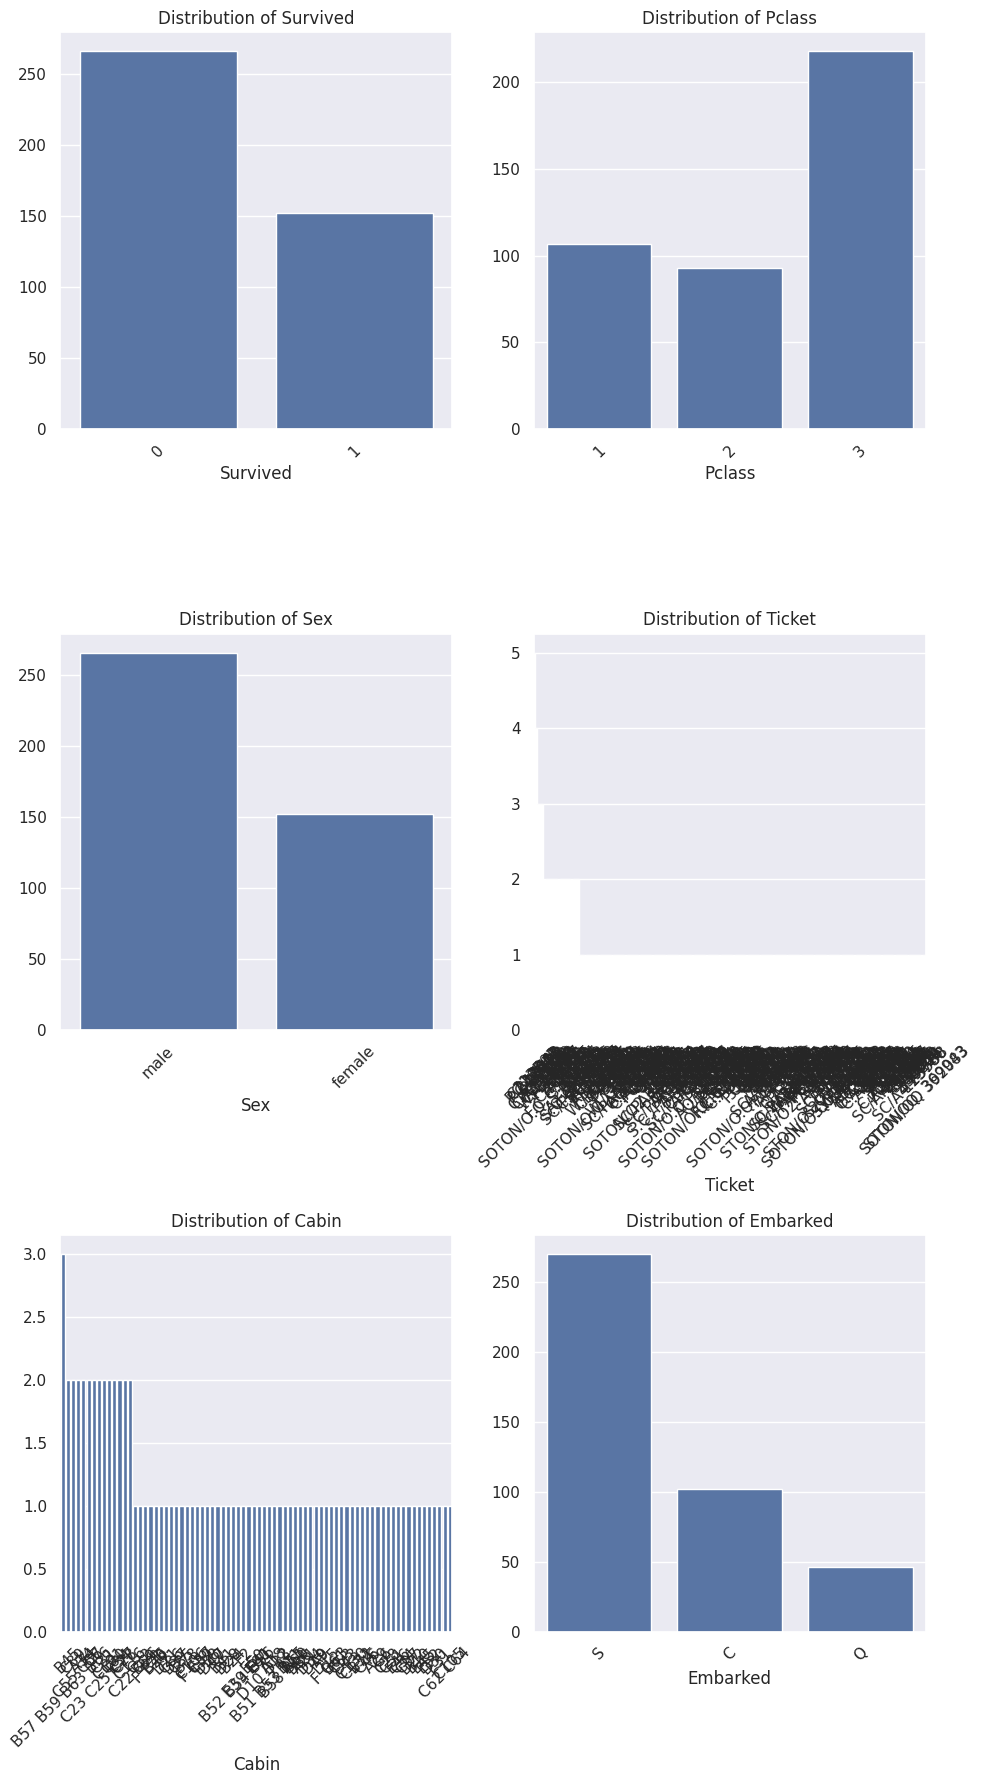

In [25]:
plt.figure(figsize=(10, len(cat_cols.columns) * 3))  # Adjust the figure size based on the number of subplots

for idx, col in enumerate(cat_cols.columns):
    value_counts = cat_cols[col].value_counts()
    plt.subplot((len(cat_cols.columns) + 1) // 2, 2, idx + 1)  # Use idx to manage the subplot positioning
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed for readability

plt.tight_layout()
plt.show()

# For better visualisation of ticket and cabin columns

In [26]:
df['cabin_num'] = df['Cabin'].str.extract(r'(\d+)') # captures the numerical part
df['cabin_cat'] = df['Cabin'].str.extract(r'([A-Z])')
df = df.drop(columns='Cabin')

df['ticket_num'] = df['Ticket'].str.extract(r'(\d+)') # captures the numerical part
df['ticket_cat'] = df['Ticket'].str.extract(r'([A-Za-z]+)')
df = df.drop(columns='Ticket')

In [27]:
df

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male   NaN      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male   NaN      0      0   
417                      Peter, Master. Michael J    male   NaN      1      1   

         Fare Embarked cabin_num cabin_cat ticket_num ticket_cat  
0      7.8292        Q       NaN       NaN     330911        NaN  
1      7.0000        S       NaN       NaN     363272        NaN  
2      9.6875        Q       NaN       NaN     240276        NaN  
3      8.6625        S       NaN       NaN     315154        NaN  
4     12.2875        S       NaN       NaN    3101298        NaN  
..        ...      ...       ...       ...        ...        ...  
413    8.0500        S       NaN       NaN          5          A  
414  108.9000        C       105         C      17758         PC  
415    7.2500        S       NaN       NaN    3101262      SOTON  
416    8.0500        S       NaN       NaN     359309        NaN  
417   22.3583        C       NaN       NaN       2668        NaN  

[418 rows x 14 columns]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
 10  cabin_num    89 non-null     object 
 11  cabin_cat    91 non-null     object 
 12  ticket_num   418 non-null    object 
 13  ticket_cat   122 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 45.8+ KB


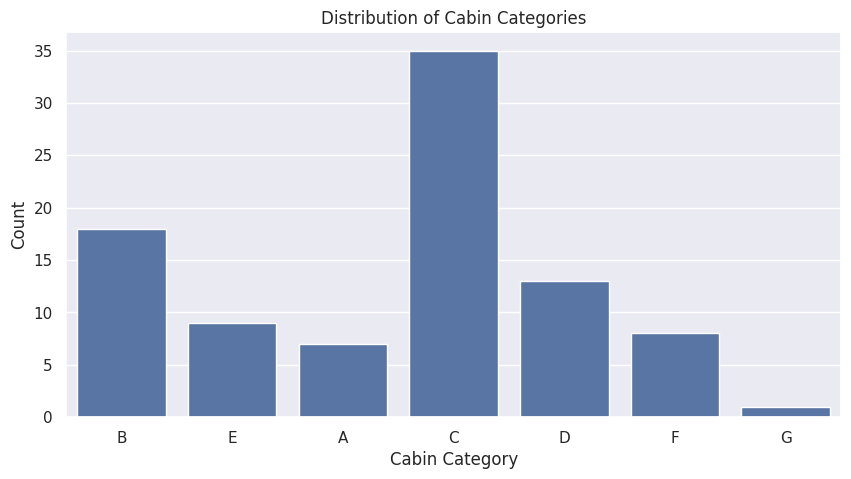

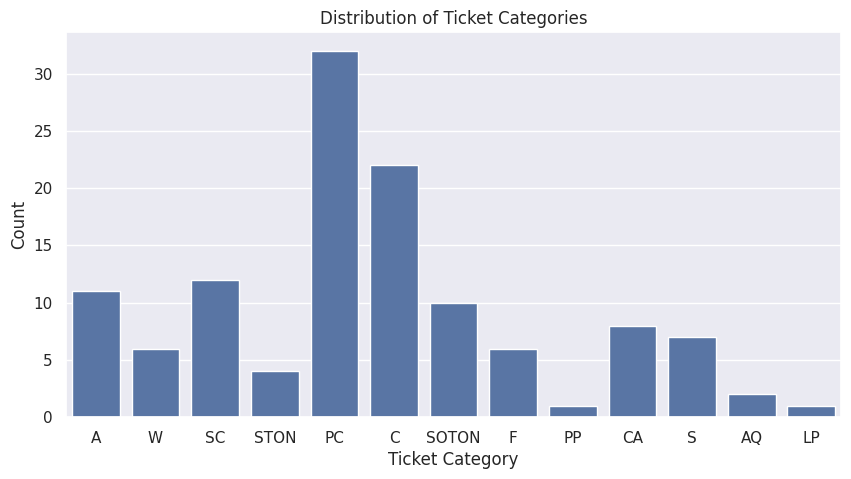

In [29]:
# Plot the distribution of cabin categories
plt.figure(figsize=(10, 5))
sns.countplot(x='cabin_cat', data=df)
plt.title('Distribution of Cabin Categories')
plt.xlabel('Cabin Category')
plt.ylabel('Count')
plt.show()

# Plot the distribution of ticket categories
plt.figure(figsize=(10, 5))
sns.countplot(x='ticket_cat', data=df)
plt.title('Distribution of Ticket Categories')
plt.xlabel('Ticket Category')
plt.ylabel('Count')
plt.show()

# EDA and Data Cleaning

In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Embarked         0
cabin_num      329
cabin_cat      327
ticket_num       0
ticket_cat     296
dtype: int64

In [31]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Fare           169
Embarked         3
cabin_num       57
cabin_cat        7
ticket_num     347
ticket_cat      13
dtype: int64

Dropping unwanted columns

In [32]:
df = df.drop(columns=['Name','ticket_num','ticket_cat','PassengerId'])

In [33]:
from sklearn.impute import KNNImputer , SimpleImputer
from sklearn.compose import ColumnTransformer

In [34]:
knn = KNNImputer()
si = SimpleImputer(strategy='most_frequent')

In [35]:
clf = ColumnTransformer(transformers=[
    ('tf1',knn,['Age','Fare']),
    ('tf2',si,['cabin_num','cabin_cat'])
],remainder='passthrough')

In [36]:
df_transformed = clf.fit_transform(df)

In [37]:
df_transformed = pd.DataFrame(df_transformed, columns = clf.get_feature_names_out())

In [38]:
df_transformed.head()

tf1__Age tf1__Fare tf2__cabin_num tf2__cabin_cat remainder__Survived  \
0     34.5    7.8292             34              C                   0   
1     47.0       7.0             34              C                   1   
2     62.0    9.6875             34              C                   0   
3     27.0    8.6625             34              C                   0   
4     22.0   12.2875             34              C                   1   

  remainder__Pclass remainder__Sex remainder__SibSp remainder__Parch  \
0                 3           male                0                0   
1                 3         female                1                0   
2                 2           male                0                0   
3                 3           male                0                0   
4                 3         female                1                1   

  remainder__Embarked  
0                   Q  
1                   S  
2                   Q  
3                   S  
4                   S

In [39]:
df_transformed.isnull().sum()

tf1__Age               0
tf1__Fare              0
tf2__cabin_num         0
tf2__cabin_cat         0
remainder__Survived    0
remainder__Pclass      0
remainder__Sex         0
remainder__SibSp       0
remainder__Parch       0
remainder__Embarked    0
dtype: int64

Imputed the missing values.

# One Hot Encoding

Let's Encode the categorical values

In [40]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tf1__Age             418 non-null    object
 1   tf1__Fare            418 non-null    object
 2   tf2__cabin_num       418 non-null    object
 3   tf2__cabin_cat       418 non-null    object
 4   remainder__Survived  418 non-null    object
 5   remainder__Pclass    418 non-null    object
 6   remainder__Sex       418 non-null    object
 7   remainder__SibSp     418 non-null    object
 8   remainder__Parch     418 non-null    object
 9   remainder__Embarked  418 non-null    object
dtypes: object(10)
memory usage: 32.8+ KB


In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
ohe = OneHotEncoder(sparse_output=False,drop='first')

In [43]:
clf2 = ColumnTransformer(transformers=[
    ('tf3',ohe,['tf2__cabin_cat','remainder__Sex','remainder__Embarked'])
],remainder='passthrough')

In [44]:
df_encoded = clf2.fit_transform(df_transformed)
df_encoded = pd.DataFrame(df_encoded,columns = clf2.get_feature_names_out())

In [45]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   tf3__tf2__cabin_cat_B           418 non-null    object
 1   tf3__tf2__cabin_cat_C           418 non-null    object
 2   tf3__tf2__cabin_cat_D           418 non-null    object
 3   tf3__tf2__cabin_cat_E           418 non-null    object
 4   tf3__tf2__cabin_cat_F           418 non-null    object
 5   tf3__tf2__cabin_cat_G           418 non-null    object
 6   tf3__remainder__Sex_male        418 non-null    object
 7   tf3__remainder__Embarked_Q      418 non-null    object
 8   tf3__remainder__Embarked_S      418 non-null    object
 9   remainder__tf1__Age             418 non-null    object
 10  remainder__tf1__Fare            418 non-null    object
 11  remainder__tf2__cabin_num       418 non-null    object
 12  remainder__remainder__Survived  418 non-null    ob

Text(0.5, 1.0, 'Age vs Fare Scatterplot')

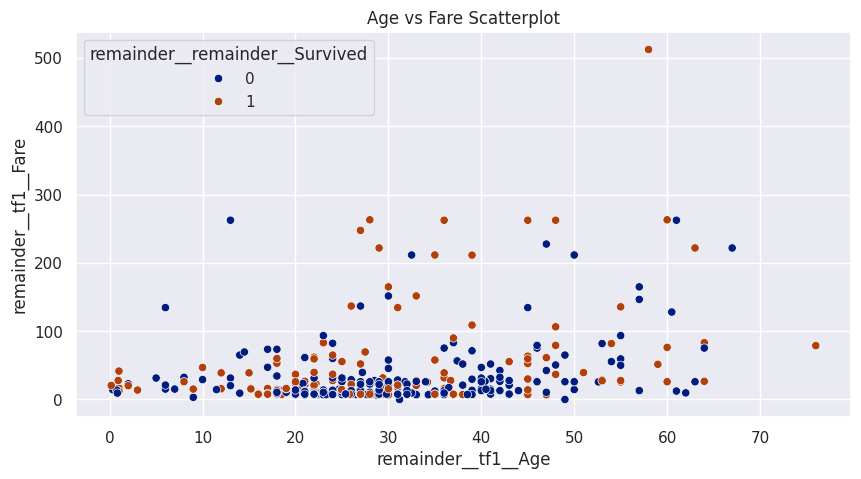

In [46]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_encoded,x='remainder__tf1__Age',y='remainder__tf1__Fare',hue='remainder__remainder__Survived',palette='dark')
plt.title('Age vs Fare Scatterplot')

> Insights from the scatterplot:
  * **Those who paid more than 100$ for the ticket have mostly survived**
  * **Most of the people age between the range 20-50**
  *  ****

<Axes: xlabel='remainder__tf1__Age', ylabel='Count'>

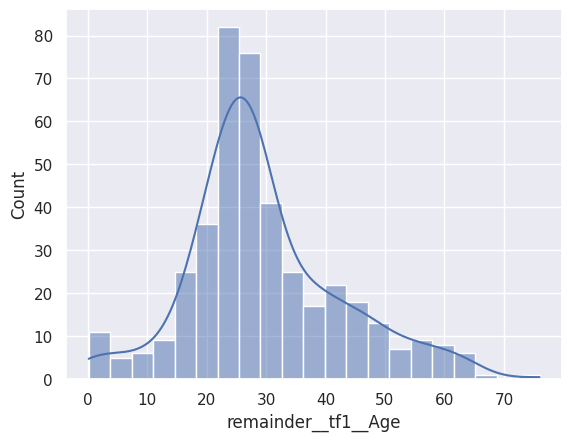

In [47]:
sns.histplot(df_encoded['remainder__tf1__Age'],kde=True)

# Profile Report for easy EDA:

In [54]:
# Install required packages
!pip install ydata-profiling pydantic-settings

from pydantic import BaseModel, Field, PrivateAttr
from pydantic_settings import BaseSettings
# Import ProfileReport from ydata_profiling instead of pandas_profiling
from ydata_profiling import ProfileReport

# Assuming df_encoded is already defined as your DataFrame
# Create a ProfileReport
profile = ProfileReport(df_encoded, title="Pandas Profiling Report", explorative=True)

# To display the report in a Jupyter notebook
profile.to_notebook_iframe()

# To save the report as an HTML file
profile.to_file("pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]